This idea of this code:
1. using the target pixel file for a candidate, get the 'APERTURE' extension (contents: `.data` is a 9x9 image of the aperture, showing which pixels were collected, and then which were used for SAP. header: WCS info, enabling this WCS transformation).
2. load the aperture extension directly into an instance of astropy's WCS module.
3. use `kepio.readMaskDefinition` to get row/col pixel indices corresponding the aperture mask. (this applies the definitions of the cryptic CRVAL, CRPIX, CDELT parameters in the APERTURE extension's header).
4. the astropy WCS module has a method that lets you go from Kepler row/col to RA/dec (given the cryptic CRVAL, CRPIX, CDELT, etc parameters, and the rotation matrix elements).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kepio ## from PyKE package
from astropy.io import fits
from astropy import wcs
%matplotlib inline

In [2]:
#reading targ file
infile="kplr012254688-2009131105131_lpd-targ.fits" 
hdulist=fits.open(infile)
w=wcs.WCS(hdulist[2].header)

In [3]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 289.37380949999999  50.934339999999999  
CRPIX : 6.0664886661902528  5.0202136100497228  
PC1_1 PC1_2  : -0.82895096620555264  -0.55826342122001049  
PC2_1 PC2_2  : 0.558909508494703  -0.8299420516807211  
CDELT : -0.0011046341119679999  0.0011046341119678421  
NAXIS : 9  9

In [4]:
print(w.__doc__)

WCS objects perform standard WCS transformations, and correct for
    `SIP`_ and `distortion paper`_ table-lookup transformations, based
    on the WCS keywords and supplementary data read from a FITS file.

    Parameters
    ----------
    header : astropy.io.fits header object, Primary HDU, Image HDU, string, dict-like, or None, optional
        If *header* is not provided or None, the object will be
        initialized to default values.

    fobj : An astropy.io.fits file (hdulist) object, optional
        It is needed when header keywords point to a `distortion
        paper`_ lookup table stored in a different extension.

    key : str, optional
        The name of a particular WCS transform to use.  This may be
        either ``' '`` or ``'A'``-``'Z'`` and corresponds to the
        ``"a"`` part of the ``CTYPEia`` cards.  *key* may only be
        provided if *header* is also provided.

    minerr : float, optional
        The minimum value a distortion correction must have in 

In [5]:
logfile="temp.log";verbose=True
maskimg, pixcoord1, pixcoord2, status = kepio.readMaskDefinition(infile,logfile,verbose)

In [6]:
maskimg

array([[0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 3, 3, 1, 1],
       [1, 1, 1, 1, 3, 3, 3, 3, 1],
       [1, 1, 1, 1, 3, 3, 3, 1, 1],
       [1, 1, 1, 1, 3, 3, 3, 1, 1],
       [1, 1, 1, 1, 3, 3, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int32)

In [7]:
pixcoord1

array([[ 1080.,  1080.,  1080.,  1080.,  1080.,  1080.,  1080.,  1080.,
         1080.],
       [ 1081.,  1081.,  1081.,  1081.,  1081.,  1081.,  1081.,  1081.,
         1081.],
       [ 1082.,  1082.,  1082.,  1082.,  1082.,  1082.,  1082.,  1082.,
         1082.],
       [ 1083.,  1083.,  1083.,  1083.,  1083.,  1083.,  1083.,  1083.,
         1083.],
       [ 1084.,  1084.,  1084.,  1084.,  1084.,  1084.,  1084.,  1084.,
         1084.],
       [ 1085.,  1085.,  1085.,  1085.,  1085.,  1085.,  1085.,  1085.,
         1085.],
       [ 1086.,  1086.,  1086.,  1086.,  1086.,  1086.,  1086.,  1086.,
         1086.],
       [ 1087.,  1087.,  1087.,  1087.,  1087.,  1087.,  1087.,  1087.,
         1087.],
       [ 1088.,  1088.,  1088.,  1088.,  1088.,  1088.,  1088.,  1088.,
         1088.]])

In [8]:
pixcoord2

array([[ 958.,  959.,  960.,  961.,  962.,  963.,  964.,  965.,  966.],
       [ 958.,  959.,  960.,  961.,  962.,  963.,  964.,  965.,  966.],
       [ 958.,  959.,  960.,  961.,  962.,  963.,  964.,  965.,  966.],
       [ 958.,  959.,  960.,  961.,  962.,  963.,  964.,  965.,  966.],
       [ 958.,  959.,  960.,  961.,  962.,  963.,  964.,  965.,  966.],
       [ 958.,  959.,  960.,  961.,  962.,  963.,  964.,  965.,  966.],
       [ 958.,  959.,  960.,  961.,  962.,  963.,  964.,  965.,  966.],
       [ 958.,  959.,  960.,  961.,  962.,  963.,  964.,  965.,  966.],
       [ 958.,  959.,  960.,  961.,  962.,  963.,  964.,  965.,  966.]])

In [9]:
w.wcs_pix2world

<bound method WCS.wcs_pix2world of WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 289.37380949999999  50.934339999999999  
CRPIX : 6.0664886661902528  5.0202136100497228  
PC1_1 PC1_2  : -0.82895096620555264  -0.55826342122001049  
PC2_1 PC2_2  : 0.558909508494703  -0.8299420516807211  
CDELT : -0.0011046341119679999  0.0011046341119678421  
NAXIS : 9  9>

In [10]:
pixcoord=np.array([pixcoord1,pixcoord2]).transpose()
wcoord=[]
for i in range(0,pixcoord.shape[0]): 
    wc=w.wcs_pix2world(pixcoord[i],1)
    wcoord.append(wc)
wcoord=np.array(wcoord) #RA DEC coordinate

In [11]:
pixcoord[0]

array([[ 1080.,   958.],
       [ 1081.,   958.],
       [ 1082.,   958.],
       [ 1083.,   958.],
       [ 1084.,   958.],
       [ 1085.,   958.],
       [ 1086.,   958.],
       [ 1087.,   958.],
       [ 1088.,   958.]])

In [12]:
pixcoord.shape

(9, 9, 2)

In [13]:
pixcoord[0,0,:]

array([ 1080.,   958.])

In [14]:
wcoord.shape # these are now ur WCS (RA/dec coordinates!). Extra dimension is row/col (I might've stored these as a tuple for each element in 9x9, but whatever).

(9, 9, 2)

In [15]:
nx=wcoord.shape[0]
ny=wcoord.shape[1]

In [16]:
print(nx,ny)

(9, 9)


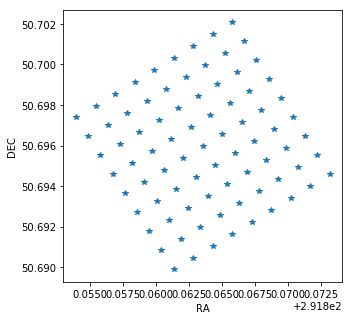

In [17]:
#showing the RA-DEC coordinate of pixels 
f, ax = plt.subplots(figsize=(5,5))

RA = wcoord.reshape(nx*ny,2).transpose()[0]
dec = wcoord.reshape(nx*ny,2).transpose()[1]
ax.plot(RA, dec, "*")
ax.set_xlabel("RA")
ax.set_ylabel("DEC")
plt.show()